<a href="https://colab.research.google.com/github/neerja198/Data-Science-Portfolio-in-Python/blob/master/Inx_Future_Employee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#Read the File using Pandas
data = pd.read_excel('/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (1).xls')

In [6]:
#Display the First Five Records using Head() , Can Pass total number of records as well e.g head(10)
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [7]:
#Function to display info about the DataSet
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

In [13]:
#This will display the total number of rows and columns
data.shape

(1200, 27)

In [0]:
data.drop(['EmpNumber'],axis=1,inplace=True)

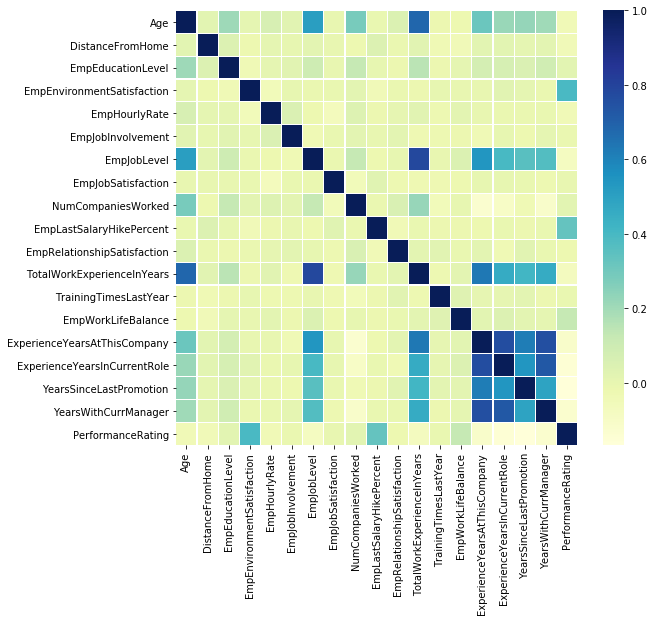

In [14]:
corrmat = data.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)


In [15]:
data_dummy = pd.get_dummies(data, drop_first=True)
data_dummy.to_csv('INX_Future_Inc.csv',index=False)
data_dummy = pd.read_csv('INX_Future_Inc.csv')
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 54 columns):
Age                                          1200 non-null int64
DistanceFromHome                             1200 non-null int64
EmpEducationLevel                            1200 non-null int64
EmpEnvironmentSatisfaction                   1200 non-null int64
EmpHourlyRate                                1200 non-null int64
EmpJobInvolvement                            1200 non-null int64
EmpJobLevel                                  1200 non-null int64
EmpJobSatisfaction                           1200 non-null int64
NumCompaniesWorked                           1200 non-null int64
EmpLastSalaryHikePercent                     1200 non-null int64
EmpRelationshipSatisfaction                  1200 non-null int64
TotalWorkExperienceInYears                   1200 non-null int64
TrainingTimesLastYear                        1200 non-null int64
EmpWorkLifeBalance                           120

In [16]:
 data.groupby('EmpDepartment').count()

,Age,Gender,EducationBackground,MaritalStatus,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpDepartment,,,,,,,,,,,,,,,,,,,,,,,,,,
Data Science,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Development,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361
Finance,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
Human Resources,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
Research & Development,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343
Sales,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373


In [17]:
data.groupby('PerformanceRating').count()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,,,,,,
2,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194
3,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874
4,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132


In [18]:
Data_Finance = data[data['EmpDepartment'] == 'Finance']
Data_Finance.groupby('PerformanceRating').count()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,,,,,,
2,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
3,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [0]:
#Copy DEPARTMENT wISE
#dept = data.iloc[:,[5,27]].copy()
#dept_per = dept.copy()


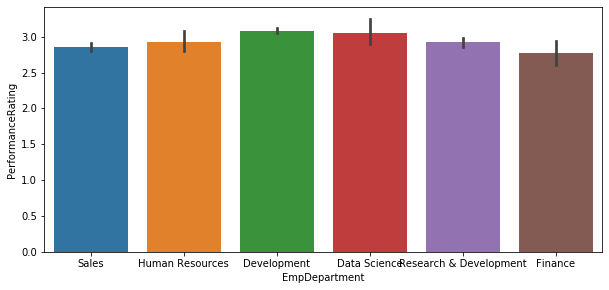

In [20]:
plt.figure(figsize=(10,4.5))
sns.barplot(data['EmpDepartment'],data['PerformanceRating'])

In [21]:
# Analyze each department separately
data.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

In [0]:
# Creating a new dataframe to analyze each department separately
department = pd.get_dummies(data['EmpDepartment'])
performance = pd.DataFrame(data['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

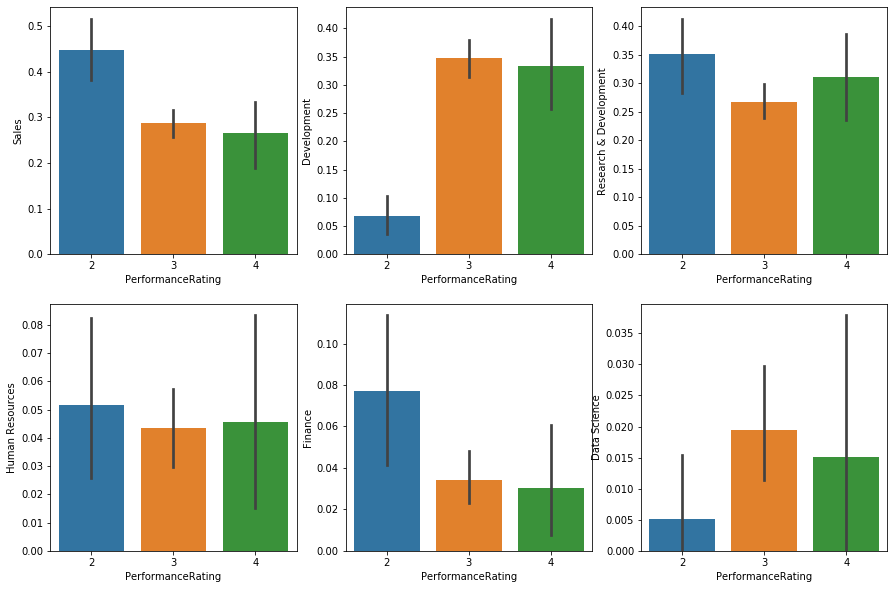

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Sales'])
plt.subplot(2,3,2)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Development'])
plt.subplot(2,3,3)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Research & Development'])
plt.subplot(2,3,4)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Human Resources'])
plt.subplot(2,3,5)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Finance'])
plt.subplot(2,3,6)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Data Science'])
plt.show()

In [0]:
corrmat = data.corr()

In [27]:
corrmat[corrmat.PerformanceRating>0.1] 

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,0.395561
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,-0.042892,-0.005933,-0.013439,-0.017001,-0.019830,-0.004957,-0.015911,-0.007666,0.333722
EmpWorkLifeBalance,-0.019563,-0.044788,0.010276,-0.000262,0.016189,-0.014129,0.049218,-0.018548,0.002489,-0.017001,-0.004906,0.015495,0.037048,1.000000,0.023479,0.045719,0.015773,0.010518,0.124429
PerformanceRating,-0.040164,-0.046142,0.020529,0.395561,-0.043116,-0.010539,-0.076632,0.000606,0.020980,0.333722,-0.019502,-0.068141,-0.005443,0.124429,-0.111645,-0.147638,-0.167629,-0.122313,1.000000


In [28]:
Env_Satisfaction = pd.crosstab(data.EmpEnvironmentSatisfaction,dept_rating.PerformanceRating)
Env_Satisfaction

PerformanceRating,2,3,4
EmpEnvironmentSatisfaction,,,
1,90,127,13
2,98,130,14
3,3,310,54
4,3,307,51


In [29]:
Env_Satisfaction.reset_index(inplace=True)
Env_Satisfaction

PerformanceRating,EmpEnvironmentSatisfaction,2,3,4
0,1,90,127,13
1,2,98,130,14
2,3,3,310,54
3,4,3,307,51


In [30]:
x = np.arange(len(Env_Satisfaction['EmpEnvironmentSatisfaction']))
x

array([0, 1, 2, 3])

Text(0.5, 1.0, 'Employee Environment Satisfaction Wise Performance')

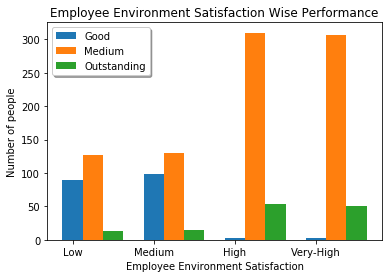

In [31]:
plt.xticks(x,['Low','Medium','High','Very-High'])
plt.bar(x+0.00, Env_Satisfaction[2],width=0.25,label='Good')
plt.bar(x+0.25, Env_Satisfaction[3],width=0.25,label='Medium')
plt.bar(x+0.50, Env_Satisfaction[4],width=0.25,label='Outstanding')
plt.legend(loc='best',shadow=True)
plt.xlabel('Employee Environment Satisfaction')
plt.ylabel('Number of people')
plt.title('Employee Environment Satisfaction Wise Performance')

In [32]:
Emp_SalaryHike = pd.crosstab(data.EmpLastSalaryHikePercent,dept_rating.PerformanceRating)
Emp_SalaryHike

PerformanceRating,2,3,4
EmpLastSalaryHikePercent,,,
11,28,140,1
12,30,123,2
13,27,138,3
14,28,140,4
15,11,67,4
16,12,54,2
17,9,55,3
18,10,63,0
19,10,51,2


In [33]:
Emp_SalaryHike.reset_index(inplace=True)
Emp_SalaryHike 

PerformanceRating,EmpLastSalaryHikePercent,2,3,4
0,11,28,140,1
1,12,30,123,2
2,13,27,138,3
3,14,28,140,4
4,15,11,67,4
5,16,12,54,2
6,17,9,55,3
7,18,10,63,0
8,19,10,51,2
9,20,9,14,27


In [34]:
x = np.arange(len(Emp_SalaryHike['EmpLastSalaryHikePercent']))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Text(0.5, 1.0, 'Last Salary Hike percent Wise Performance')

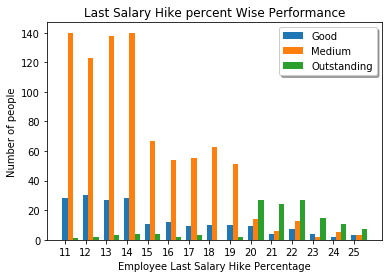

In [35]:
plt.xticks(x,Emp_SalaryHike['EmpLastSalaryHikePercent'])
plt.bar(x+0.00, Emp_SalaryHike[2],width=0.25,label='Good')
plt.bar(x+0.25, Emp_SalaryHike[3],width=0.25,label='Medium')
plt.bar(x+0.50, Emp_SalaryHike[4],width=0.25,label='Outstanding')
plt.legend(loc='best',shadow=True)
plt.xlabel('Employee Last Salary Hike Percentage')
plt.ylabel('Number of people')
plt.title('Last Salary Hike percent Wise Performance')

In [36]:
EmpWorkLife_Balance = pd.crosstab(data.EmpWorkLifeBalance,dept_rating.PerformanceRating)
EmpWorkLife_Balance

PerformanceRating,2,3,4
EmpWorkLifeBalance,,,
1,16,48,0
2,51,216,27
3,115,533,79
4,12,77,26


In [37]:
EmpWorkLife_Balance.reset_index(inplace=True)
EmpWorkLife_Balance

PerformanceRating,EmpWorkLifeBalance,2,3,4
0,1,16,48,0
1,2,51,216,27
2,3,115,533,79
3,4,12,77,26


In [39]:
x = np.arange(len(EmpWorkLife_Balance['EmpWorkLifeBalance']))
x

array([0, 1, 2, 3])

Text(0.5, 1.0, 'EmpWork Life Balance Percentage Wise Performance')

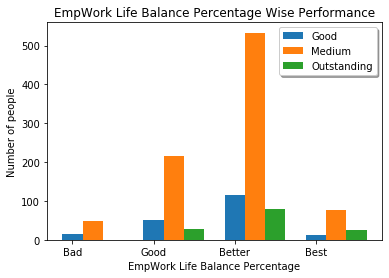

In [40]:
plt.xticks(x,['Bad','Good','Better','Best'])
plt.bar(x+0.00, EmpWorkLife_Balance[2],width=0.25,label='Good')
plt.bar(x+0.25, EmpWorkLife_Balance[3],width=0.25,label='Medium')
plt.bar(x+0.50, EmpWorkLife_Balance[4],width=0.25,label='Outstanding')
plt.legend(loc='best',shadow=True)
plt.xlabel('EmpWork Life Balance Percentage')
plt.ylabel('Number of people')
plt.title('EmpWork Life Balance Percentage Wise Performance')

In [0]:
X = data_dummy.drop(['PerformanceRating'],axis=1)
Y = data_dummy['PerformanceRating']

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.24,random_state=0)

In [0]:
classifier = RandomForestClassifier(n_estimators=104, random_state=40)
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)

In [44]:
accuracy_score(Y_test,y_pred)

0.9583333333333334

In [45]:
confusion_matrix(Y_test,y_pred)


array([[ 37,   3,   0],
       [  2, 213,   2],
       [  0,   5,  26]])

For confusion matrix Reference

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

In [46]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           2       0.95      0.93      0.94        40
           3       0.96      0.98      0.97       217
           4       0.93      0.84      0.88        31

    accuracy                           0.96       288
   macro avg       0.95      0.92      0.93       288
weighted avg       0.96      0.96      0.96       288



In [47]:
# Training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf', C=100, random_state=10).fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [49]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(Y_test,y_predict_svm))
print(classification_report(Y_test,y_predict_svm))

0.7465277777777778
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        40
           3       0.76      0.98      0.85       217
           4       0.60      0.10      0.17        31

    accuracy                           0.75       288
   macro avg       0.45      0.36      0.34       288
weighted avg       0.64      0.75      0.66       288

